## 1주차 전처리와EDA 과제 

1. 아파트 경매가격 예측 모델링 데이터 불러오기

데이터: Auction_master_train.csv(Target 변수: Hammer price)

데이터를 불러온 후, 데이터 확인

In [64]:
import pandas as pd
import numpy as np


In [65]:
pd.set_option('max_columns',24,'max_rows',20)

In [66]:
df = pd.read_csv('Auction_master_train.csv')

In [67]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,...,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,...,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,...,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,...,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,...,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [69]:
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


## 1) 전처리 및 EDA 과정 진행

1. 결측값이 있는 모든 열 없애기

결측값 처리를 위해 결측치가 있는 열을 아예 제거하는 dropna() method를 사용하였습니다

In [70]:
df = df.dropna(axis=1)

In [71]:
#결측치 제거 전에는 41 columns이었는데 제거 후 35 columns가 된 것을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 35 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [72]:
#파이썬 시각화 패키지 설치
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
plt.style.use('seaborn') 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


## 2) 모든 연속형 변수 간의 상관관계 Heatmap을 통해 확인

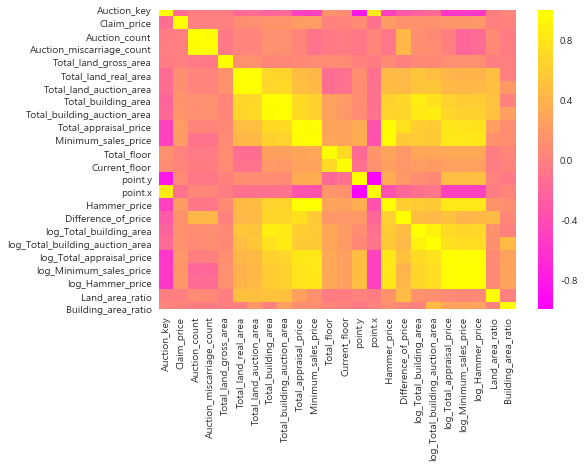

In [116]:
sns.heatmap(df.corr(),cmap = 'spring')
plt.show()

## 3) 모든 연속형 변수의 분포를 histogram으로 확인

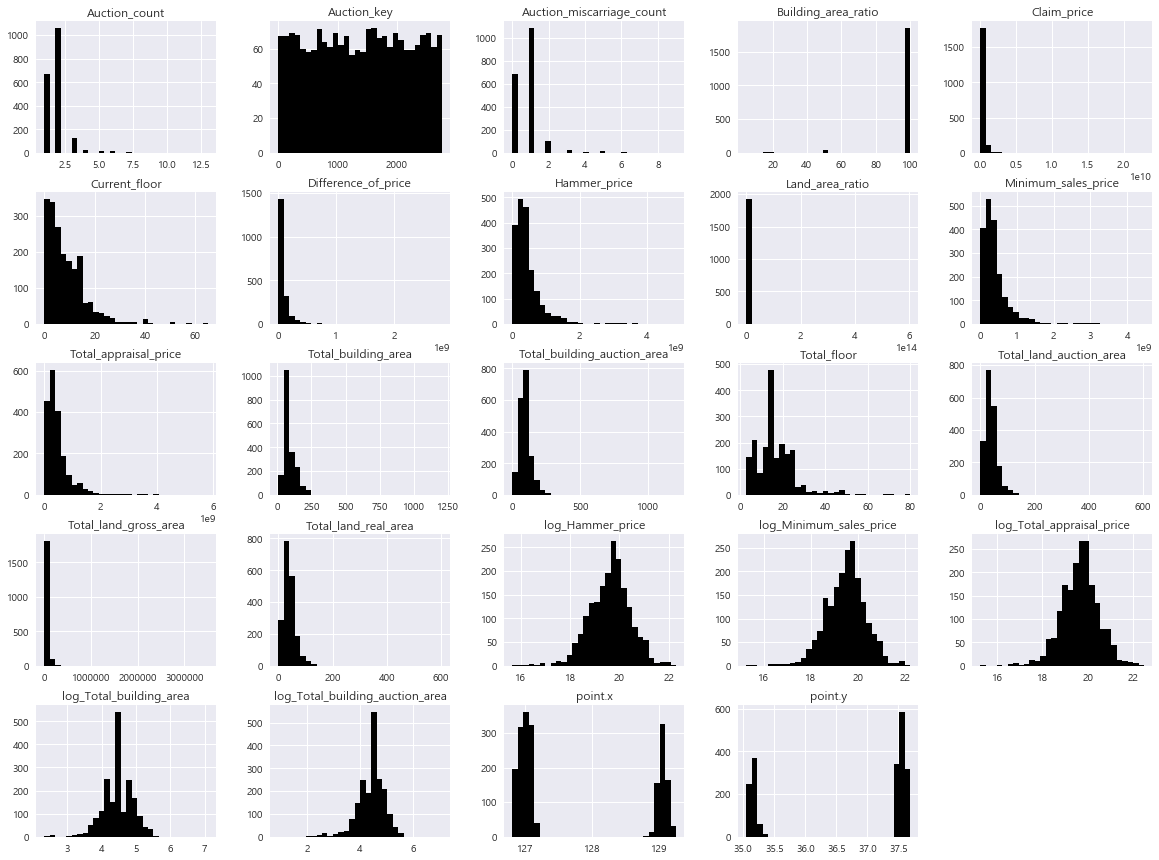

In [117]:
df.hist(bins=30,figsize=(20,15), color='k')
plt.show()

## 4) Target 변수와 관련이 있거나, 유의미한 insight를 얻을 수 있는 시각화 하기(subplot활용)

target 변수와 관련있는 시각화를 하기 위해 다음과 같은 시각화를 진행하였습니다
유의미한 insight를 얻기 위해서 전체적으로는 모든 변수들과 낙찰가와의 관계를 알아보기 위한 시각화를 하였습니다

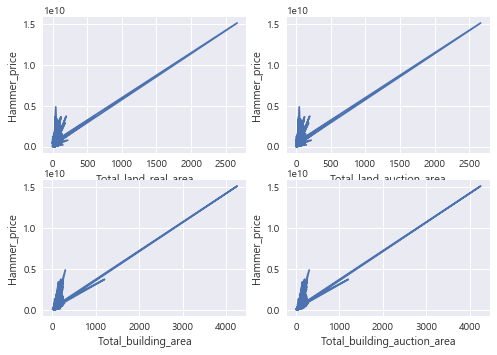

In [76]:
#관련내용과 같은 그래프 모형을 사용한것끼리 subplot을 이용해 묶었습니다!

#면적과 관련한 시각화입니다

#1번: 총토지실면적이 넓을수록 낙찰가가 높다
plt.subplot(2,2,1)
plt.plot(df['Total_land_real_area'],df['Hammer_price'])
plt.xlabel('Total_land_real_area')
plt.ylabel('Hammer_price')

#2번: 총토지경매면적이 넓을수록 낙찰가가 높다
plt.subplot(2,2,2)
plt.plot(df['Total_land_auction_area'],df['Hammer_price'])
plt.xlabel('Total_land_auction_area')
plt.ylabel('Hammer_price')

#3번: 총건물면적이 넓을수록 낙찰가가 높다
plt.subplot(2,2,3)
plt.plot(df['Total_building_area'],df['Hammer_price'])
plt.xlabel('Total_building_area')
plt.ylabel('Hammer_price')

#4번: 총건물경매면적이 넓을수록 낙찰가가 높다
plt.subplot(2,2,4)
plt.plot(df['Total_building_auction_area'],df['Hammer_price'])
plt.xlabel('Total_building_auction_area')
plt.ylabel('Hammer_price')
      
plt.show()

#결국 토지나 경매의 실면적과 경매면적이 넓을수록 낙찰가가 높은 경향을 발견할 수 있었습니다

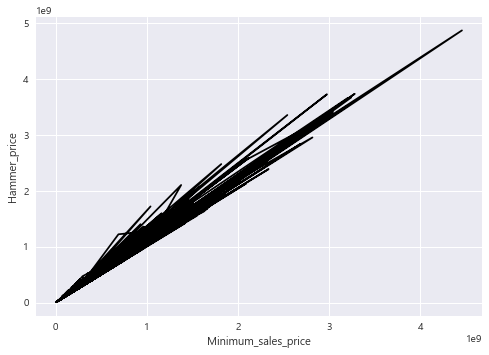

In [106]:
#최저매각가격(입찰 시 입찰인이 최저로 제시해야 하는 금액)과 낙찰가의 관계를 알아보려 하였습니다

plt.plot(df['Minimum_sales_price'],df['Hammer_price'], color = 'black')
plt.xlabel('Minimum_sales_price')
plt.ylabel('Hammer_price')

plt.show()

#최저매각가격이 높으면 낙찰가의 가격 역시 높다는 것을 확인할 수 있었습니다

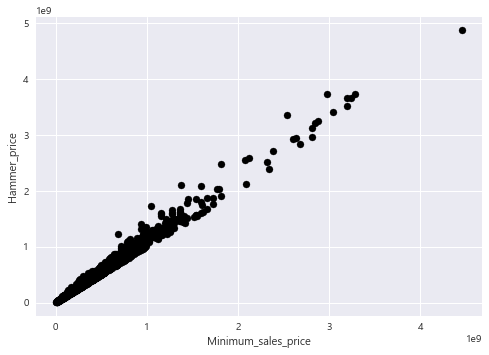

In [107]:
#위의 그래프를 범위설정을 통해 데이터 전처리 후 scatter plot을 통해서도 나타내 보았습니다
df = df.query('Minimum_sales_price>0 & Minimum_sales_price < 0.6*1e10 & Hammer_price>0')
plt.scatter(x=df['Minimum_sales_price'],y = df['Hammer_price'],color = 'black')
plt.xlabel('Minimum_sales_price')
plt.ylabel('Hammer_price')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

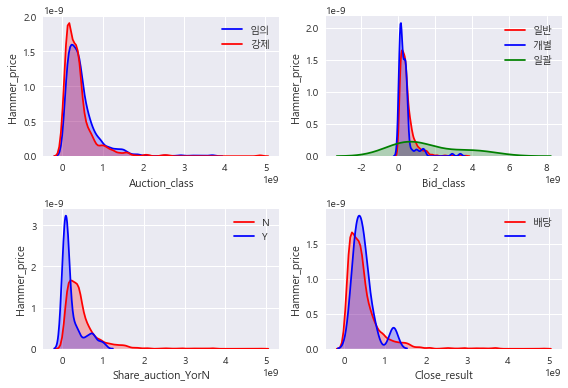

In [79]:
#여러 범주형 변수들과 낙찰가의 관계를 알고 싶어 kde plot(커널 밀도 함수)를 활용하였습니다
#아무래도 이 방법으로 하니까 x축에 범주형 변수가 들어가서 그래프가 한쪽으로 치우쳐 있어 보기에 약간 불편할 수도 있지만...
#insight얻기에는 충분하다고 생각하였습니다... 

#강제경매(법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행)의 경우 임의경매(등기부동본, 담보권 등으로 경매를 진행)의 
#경우보다 낙찰가 더 높은 경향을 보였다
g1 = plt.subplot(2,2,1)
g1 = sns.kdeplot(df.query('Auction_class == "임의"')['Hammer_price'], color = "blue",shade= True)
g1 = sns.kdeplot(df.query('Auction_class == "강제"')['Hammer_price'], color = 'red', shade = True)
g1.set_xlabel('Auction_class') 
g1.set_ylabel('Hammer_price')
g1 = g1.legend(['임의','강제'])

#개별입찰인 경우 일반입찰이나 일괄입찰인 경우보다 낙찰가가 높은 경향을 보였다
g2 = plt.subplot(2,2,2)
g2 = sns.kdeplot(df.query('Bid_class == "일반"')['Hammer_price'], color = "red",shade = True)
g2 = sns.kdeplot(df.query('Bid_class == "개별"')['Hammer_price'], color = "blue", shade = True)
g2 = sns.kdeplot(df.query('Bid_class == "일괄"')['Hammer_price'], color = "green", shade = True)
g2.set_xlabel('Bid_class')
g2.set_ylabel('Hammer_price')
g2 = g2.legend(['일반','개별','일괄'])

#하나의 부동산이 전체가 아닌 일부만 경매가 진행되는 지분경매일 경우 훨씬 높은 낙찰가를 보였습니다
g3 = plt.subplot(2,2,3)
g3 = sns.kdeplot(df.query('Share_auction_YorN == "N"')['Hammer_price'], color = "red",shade= True)
g3 = sns.kdeplot(df.query('Share_auction_YorN == "Y"')['Hammer_price'], color = 'blue', shade = True)
g3.set_xlabel('Share_auction_YorN') 
g3.set_ylabel('Hammer_price')
g3 = g3.legend(['N','Y'])

#이 그래프는  두 범주가 거의 차이를 보이지 않아서.. 별다른 insight를 얻지는 못하였습니다..
g4 = plt.subplot(2,2,4)
g4 = sns.kdeplot(df.query('Close_result== "배당"')['Hammer_price'], color = "red",shade= True)
g4 = sns.kdeplot(df.query('Close_result == "    "')['Hammer_price'], color = 'blue', shade = True)
g4.set_xlabel('Close_result') 
g4.set_ylabel('Hammer_price')
g4 = g4.legend(['배당','    '])

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

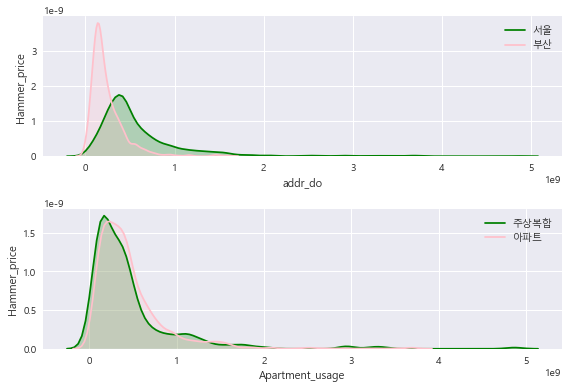

In [110]:
#지역, 건물용도에 관한 범주형 변수와 낙찰가와의 관계도 위와 동일한 방법으로 알아보았습니다

#서울이 부산보다 낙찰가가 높은 건물이 많이 있었다는 것을 확인할 수 있습니다. 서울지역이 부산지역보다 낙찰가가 높습니다
g1 = plt.subplot(2,1,1)
g1 = sns.kdeplot(df.query('addr_do == "서울"')['Hammer_price'], color = "green",shade= True)
g1 = sns.kdeplot(df.query('addr_do == "부산"')['Hammer_price'], color = 'pink', shade = True)
g1.set_xlabel('addr_do') 
g1.set_ylabel('Hammer_price')
g1 = g1.legend(['서울','부산'])


#건물용도는 낙찰가와 관련이 없나 봅니다...ㅎ
g2 = plt.subplot(2,1,2)
g2 = sns.kdeplot(df.query('Apartment_usage == "주상복합"')['Hammer_price'], color = "green",shade= True)
g2 = sns.kdeplot(df.query('Apartment_usage == "아파트"')['Hammer_price'], color = 'pink', shade = True)
g2.set_xlabel('Apartment_usage') 
g2.set_ylabel('Hammer_price')
g2 = g2.legend(['주상복합','아파트'])


plt.tight_layout()
plt.show

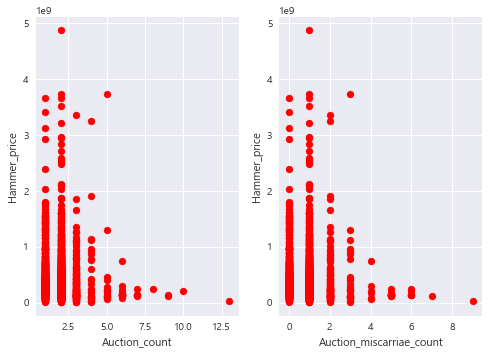

In [105]:
#총경매횟수와 총유찰횟수가 어느정도일때 낙찰가가 높은지를 알고싶어서 scatter plot을 사용하였습니다


plt.subplot(1,2,1)
plt.scatter(df['Auction_count'],df['Hammer_price'],color = 'red')
plt.xlabel('Auction_count')
plt.ylabel('Hammer_price')

plt.subplot(1,2,2)
plt.scatter(df['Auction_miscarriage_count'],df['Hammer_price'],color = 'red')
plt.xlabel('Auction_miscarriae_count')
plt.ylabel('Hammer_price')

plt.show()

#총경매횟수와 총유찰횟수 모두 약 1~2회의 경우 낙찰가가 가장 높게 드러났습니다
#총경매횟수와 총유찰횟수가 많다는 것은 낙찰가가 낮다는 것을 의미한다고 볼 수 있습니다

In [82]:
df_year= df
df2=df

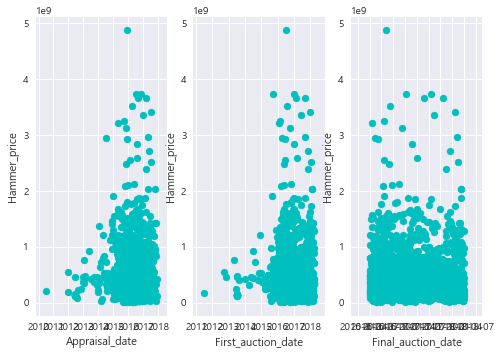

In [113]:
df= df.query('Hammer_price>0 & Hammer_price<0.6*1e10')
#이상치가 보이길래 제외시키고 확인하였습니다

#날짜와 관련된 변수들과 낙찰가와의 관계를 알고 싶어 이 역시 scatter plot을 사용하였습니다

#감정일자, 최초경매일, 최종경매일 모두 최근쪽으로 올수록 낙찰가가 높아지는 것을 확인할 수 있습니다
#시간이 지날수록 아파트 경매가격은 올라갔다 (최종경매일 제외)
#final_auction_date는 hammer price에 큰 영향을 미치지는 않은 듯 합니다..

df['Appraisal_date'] = pd.to_datetime(df.Appraisal_date)
df.sort_values(by = ['Appraisal_date'],inplace=True, ascending=True)
plt.subplot(1,3,1)
plt.scatter(df['Appraisal_date'],df['Hammer_price'], color = 'c')
plt.xlabel('Appraisal_date')
plt.ylabel('Hammer_price')

df['First_auction_date'] = pd.to_datetime(df.First_auction_date)
df.sort_values(by = ['First_auction_date'],inplace=True, ascending=True)
plt.subplot(1,3,2)
plt.scatter(df['First_auction_date'],df['Hammer_price'], color = 'c')
plt.xlabel('First_auction_date')
plt.ylabel('Hammer_price')

df['Final_auction_date'] = pd.to_datetime(df.Final_auction_date)
df.sort_values(by = ['Final_auction_date'],inplace=True, ascending=True)
plt.subplot(1,3,3)
plt.scatter(df['Final_auction_date'],df['Hammer_price'], color = 'c')
plt.xlabel('Final_auction_date')
plt.ylabel('Hammer_price')

plt.show()

Text(0, 0.5, 'Hammer_price')

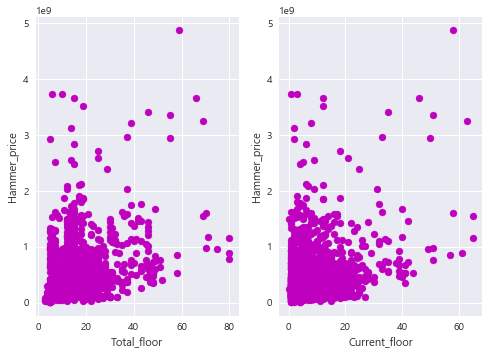

In [115]:
#총층수와 현재층수에 따른 낙찰가도 알고 싶어 이역시 scatter plot을 사용했습니다
#(다양한 plot을 사용해보려고 여러 시도를 해보았는데 유의미한 insight를 얻기에는 이 plot들이 제일 나은 것 같아서 어쩔 수 없이 다양한 plot 사용 못해서 죄송합니다...ㅠ)


df= df.query('Hammer_price>0 & Hammer_price<0.6*1e10')
#이상치가 보이길래 제외시키고 확인하였습니다

#1번: 고층건물은 낙찰가가 낮은 데이터는 많이 분포하지 않음을 알 수 있었습니다
plt.subplot(1,2,1)
plt.scatter(df['Total_floor'],df['Hammer_price'], color = 'm')
plt.xlabel('Total_floor')
plt.ylabel('Hammer_price')

#2번: 현재층수 역시 총층수와 비슷한 분포를 보였는데, 약 25-30층 구간에서부터는 낮은 hammerprice 데이터값이 전혀 분포하지 않음을 확인할 수 있습니다
plt.subplot(1,2,2)
plt.scatter(df['Current_floor'],df['Hammer_price'], color='m')
plt.xlabel('Current_floor')
plt.ylabel('Hammer_price')

## 2. 유의미한 feature 10개 이상 생성하시오

제가 이 모든 걸 다 처음해봐서..많이 헤맸습니다.. 정말 고민 많이해봤는데도 잘 모르겠더라고요ㅜㅜㅜ 그래도 최선을 다했습니다.. 보잘것없는 feature들이라 죄송합니다ㅠㅠ흑 


In [85]:
#날짜데이터는 연속데이터?는 아니지만 연도별로 구간을 나누어 범주형 변수로 만드는게 예측할때 머신러닝 모델에 더 적합할거라 생각했습니다
#그리고 앞서 시각화부분에서 특히 감정일자와 hammerprice의 관계를 통해
#최근연도일경우 hammer price가 더 높은걸 확인할 수 있었는데 
#연도별로 나타내면 그 경향을 더 잘 파악할 수 있을 것 같았습니다!
#그래서 날짜관련 변수들을 모두 연도별로 나누어 feature을 생성하였습니다

#첫번째 feature 생성(감정일자를 연도별로 나눔)
#이 feature을 만들 때는 datetime type보다 그냥 object dtype을 사용하는게 더 구현하기 편한 것 같아서 미리 만들어둔 df_year을 사용하였습니다

def appraisal_year(x):
    if x[3] == '5':        
        return '2015'
    elif x[3] == '6':
        return '2016'
    elif x[3] == '7':
        return '2017'
    else:
        return '2015 이전'


df['Appraisal_year'] = df_year['Appraisal_date'].apply(appraisal_year)
df['Appraisal_year'].value_counts()


2016       964
2015       458
2017       427
2015 이전     83
Name: Appraisal_year, dtype: int64

In [86]:
#두번째 feature 생성(최초경매일을 연도별로 나눔)
def first_auction_year(x):
    if x[3] == '5':        
        return '2015'
    elif x[3] == '6':
        return '2016'
    elif x[3] == '7':
        return '2017'
    elif x[3] == '8':
        return '2018'
    else:
        return '2015 이전'

df['First_auction_year'] = df_year['First_auction_date'].apply(first_auction_year)
df['First_auction_year'].value_counts()

df['First_auction_year'].value_counts()

2016       962
2017       780
2018        93
2015        63
2015 이전     34
Name: First_auction_year, dtype: int64

In [87]:
#세번째 feature 생성(최종경매일을 연도별로 나눔)
def final_auction_year(x):
    if x[3] == '6':
        return '2016'
    elif x[3] == '7' :
        return '2017'
    elif x[3] =='8':
        return '2018'
    else:
        return '2015 이전'
    
    
df['Final_auction_year'] = df_year['Final_auction_date'].apply(final_auction_year)
df['Final_auction_year'].value_counts()

2016    938
2017    799
2018    195
Name: Final_auction_year, dtype: int64

In [88]:
#네번째 feature 생성
#최저매각가격과 총감정가의 차이 feature 생성
#최초경매시의 감정가가 최저매각가격이 되는데 최저매각가격과 총감정가의 차이가 크다는 것은
#낙찰가가 낮아질 것 같다는 insight를 얻을 수 있을 것 같아 이 feature을 생성하였습니다

def difference_of_price(x,y):
    difference = abs(x-y)
    return difference

df['Difference_of_price'] = df.apply(lambda x:difference_of_price(x['Minimum_sales_price'],x['Total_appraisal_price']),axis=1)
    

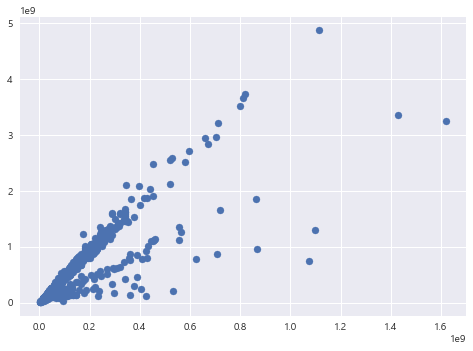

In [89]:
df_md1= df.query('Difference_of_price>0 & Difference_of_price<1.8*1e9')
plt.scatter(df_md1['Difference_of_price'],df_md1['Hammer_price'])
plt.show()

In [90]:
#다섯번째~아홉번째 feature 생성

#앞서 시각화한 histogram을 확인했을 때 전체적으로 왼쪽에 과하게 치우쳐져 있었는데
#이를 정규분포에 가깝게 변화시키는 feature을 생성하였습니다
def log_distribution(x):
    f,ax = plt.subplots(1,2)
    
    x.hist(ax=ax[0],color = 'black')
    ax[0].set_title(x.name + '변환 전')
    
    np.log(x).hist(ax=ax[1],color = 'green')
    ax[1].set_title(x.name + '변환 후')
    plt.show()

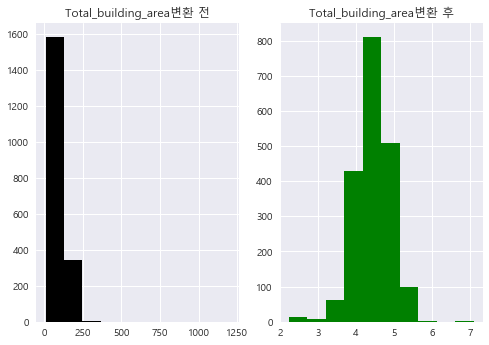

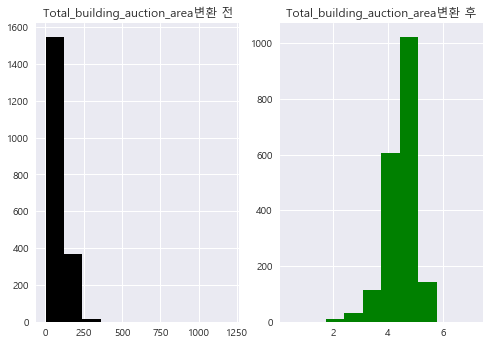

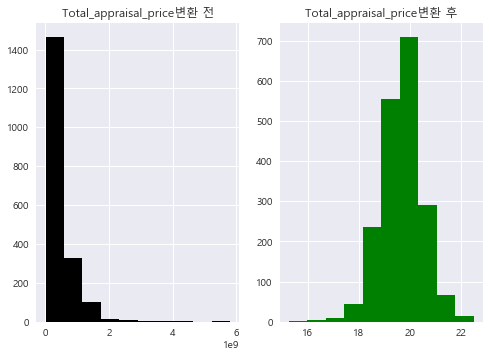

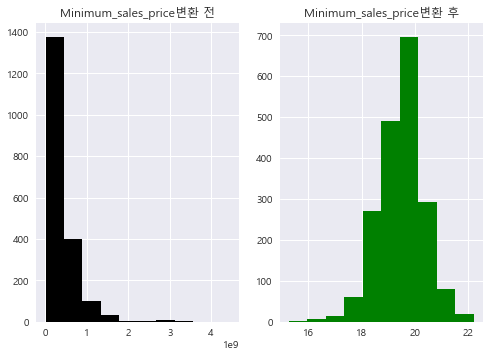

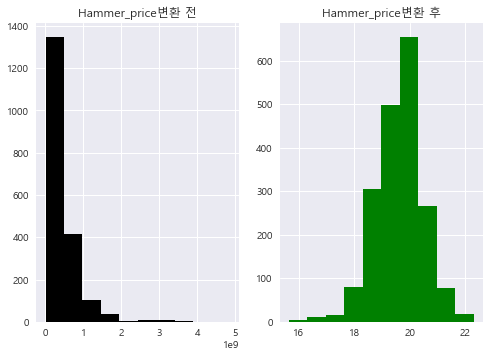

In [91]:
#히스토그램에서 확인하였던 연속형변수를 확인하였고, 확인결과 범위를 오버한 변수들은 제외시켰습니다
df_continuous = ['Claim_price', 'Total_land_gross_area', 'Total_land_real_area','Total_land_auction_area',
                          'Total_building_area','Total_building_auction_area','Total_appraisal_price','Minimum_sales_price','Hammer_price']
df_continuous.remove('Claim_price')
df_continuous.remove('Total_land_gross_area')
df_continuous.remove('Total_land_real_area')
df_continuous.remove('Total_land_auction_area')

for cols in df_continuous:
    try:
        log_distribution(df[cols])
    except:
        print(cols + ' 는 범위 오버')

In [92]:
for cols in df_continuous:
    df['log_'+ cols] =np.log(df[cols]+1)
    #총 5개의 feature을 추가하였습니다

In [93]:
#열번째 feature 생성
#총토지경매면적/총토지전체면적 비율 feature 생성
#면적에 대한 시각화를 통해 경매 면적이 넓을 수록 낙찰가가 높다는 것을 확인하였는데
#총 토지전체면적에 대한 경매면적의 비율 역시 hammer price와 관련이 있지 않을까 생각이 들어 feature를 생성하였습니다

def land_area_ratio(x,y):
    ratio = abs(x/(y+1e-10)*100) #y에 대입할 변수가 0을 포함하는 데이터도 있길래 분모자리에 1e-10을 더했습니다
    return ratio

df['Land_area_ratio'] = df.apply(lambda x:land_area_ratio(x['Total_land_auction_area'],x['Total_land_gross_area']),axis=1)


df['Land_area_ratio'].value_counts()


0.000000    44
3.129699     9
3.424812     6
0.045979     4
0.044409     4
            ..
0.235888     1
0.307667     1
0.021999     1
0.063756     1
0.058399     1
Name: Land_area_ratio, Length: 1690, dtype: int64

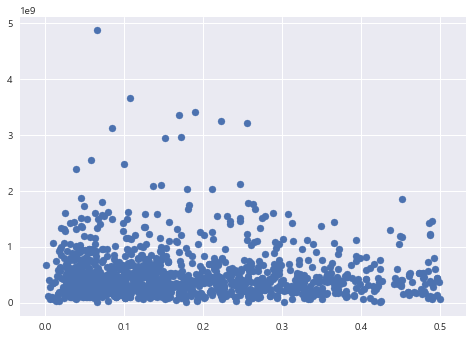

In [94]:
df_md= df.query('Land_area_ratio>0 & Land_area_ratio<0.5')
plt.scatter(df_md['Land_area_ratio'],df_md['Hammer_price'])
plt.show()

In [95]:
#열한번째 feature 생성
#총건물경매면적/총건물면적 비율 feature 생성
#위와 동일하게 총 건물면적에 대한 경매면적의 비율 역시 hammer price와 관련이 있지 않을까 생각이 들어 feature를 생성하였습니다

def building_area_ratio(x,y):
    ratio = abs(x/y*100)
    return ratio

df['Building_area_ratio'] = df.apply(lambda x:building_area_ratio(x['Total_building_auction_area'],x['Total_building_area']),axis=1)


#df['Building_area_ratio'].value_counts()
#하지만 확인결과 이 feature의 경우 100%인 데이터가 대부분이라 유의미한 feature이지는 않은 것 같습니다..

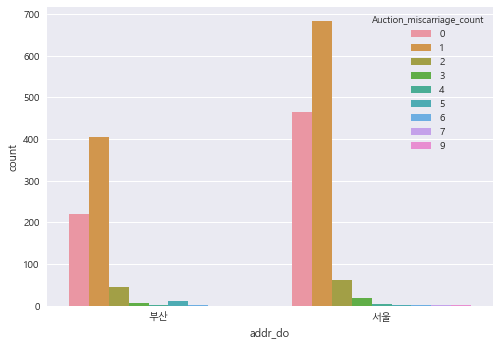

In [96]:
#열두번째 feature 생성

#앞의 과제문제 때 해보았던 시각화인데 hammer price와 관련이 없어 위에 추가하지는 않았습니다

sns.countplot(x='addr_do', hue='Auction_miscarriage_count', data=df)

#이 plot을 지역을 예를 들어 총유찰횟수를 비교하였는데 이를 보면 2이상을 거의 넘어가지 않고  거의 0과 1로 나누어집니다
#범주가 9개가 되는 auction_miscarriage_count보다 유찰의 유무 N,Y 둘로 나누는게 좋을 것 같다 생각했습니다

In [97]:
#위의 insight를 기반으로 새로운 feature 생성

def auction_miscarriage_YorN(x):
    if x<1:
        return 'N'
    else:
        return 'Y'
    
    
df['Auction_miscarriage_YorN'] = df['Auction_miscarriage_count'].apply(auction_miscarriage_YorN)
df['Auction_miscarriage_YorN'].value_counts()

Y    1247
N     685
Name: Auction_miscarriage_YorN, dtype: int64

In [98]:
#열세번째 feature 생성
#최초경매일과 최종경매일의 차이를 통해 경매동안 걸린 기간에 대한 feature 생성했습니다
#앞선 시각화에서 final_auction_date는 크게 상관이 없는걸 확인했는데 오히려 걸린기간이 hammer price에 유의미한 관련이 있을 거라고 생각했습니다
#이미 앞서 시각화를 할때 datetime type으로 전환시켜둔 상태여서 그 과정은 생략하였습니다

df['Elapsed_days'] = df['Final_auction_date'] - df['First_auction_date']
df['Elapsed_days'].value_counts()


0 days       594
35 days      446
28 days      230
42 days       95
70 days       50
            ... 
48 days        1
1085 days      1
581 days       1
85 days        1
1330 days      1
Name: Elapsed_days, Length: 136, dtype: int64

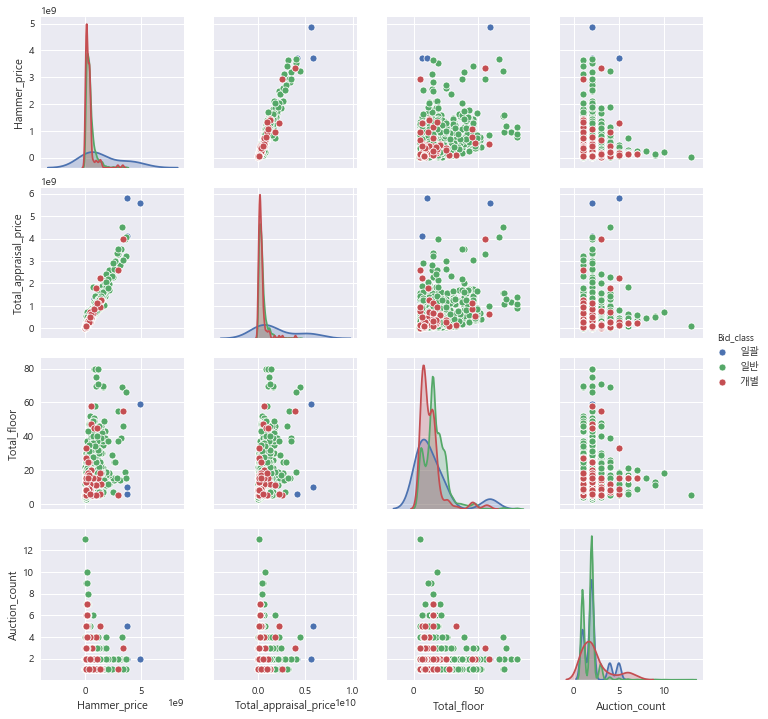

In [99]:
#열네번째 feature 생성
#이 plot의 total floor과 관련해서 확인해보면
#개별의 경우 거의 저층건물들임을 확인할 수 있습니다
#이처럼 변수들간의 차이를 보기 위해서 건물의 층수를 이용해 건물을 고층, 중층, 저층 건물로 분류하는 feature을 생성하려 하였습니다
sns.pairplot(data=df, vars=['Hammer_price','Total_appraisal_price','Total_floor','Auction_count'], hue ='Bid_class')
plt.show()

In [100]:
#또한 매우 높은 고층의 경우 hammer price가 낮은 데이터가 발견할 수 없다는 insight를 얻었었는데
#이 이유로도 건물도 총층수에 따라 고층, 저층, 중층 건물로 분류하는게 더 좋을 것 같다고 생각했습니다

#고층과 저층 기준은 임의적으로 정하였습니다
def building_type(x):
    if x>14:
        return '고층건물'
    elif x<6:
        return '저층건물'
    else:
        return '중층건물'
df['Building_type'] =df['Total_floor'].apply(building_type)
df['Building_type'].value_counts()

고층건물    1248
중층건물     540
저층건물     144
Name: Building_type, dtype: int64

In [101]:
df.info() #총 14개의 새로운 feature가 생성되었습니다!!
#범주의 수가 적은 범주형변수들만 encoding을 진행해보겠습니다..!
categoricals = ['Auction_class','Bid_class','addr_do','Apartment_usage',
               'Share_auction_YorN','Appraisal_year','First_auction_year','Final_auction_year',
               'Auction_miscarriage_YorN','Building_type']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 204 to 1252
Data columns (total 49 columns):
Auction_key                        1932 non-null int64
Auction_class                      1932 non-null object
Bid_class                          1932 non-null object
Claim_price                        1932 non-null int64
Appraisal_company                  1932 non-null object
Appraisal_date                     1932 non-null datetime64[ns]
Auction_count                      1932 non-null int64
Auction_miscarriage_count          1932 non-null int64
Total_land_gross_area              1932 non-null float64
Total_land_real_area               1932 non-null float64
Total_land_auction_area            1932 non-null float64
Total_building_area                1932 non-null float64
Total_building_auction_area        1932 non-null float64
Total_appraisal_price              1932 non-null int64
Minimum_sales_price                1932 non-null int64
First_auction_date                 1932 non-

In [102]:
df_categs = pd.get_dummies(df[categoricals],prefix = categoricals)
#이건 feature생성은 아니었지만.. 강의자료에 있는거 해보고 싶어서 해본거에요!..ㅎ